### Module 20 Challenge with additional exploratory review with standard scaled data and MinMax scaler.

In [55]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# data science
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# ML Helpers/Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering

# trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# fun ones
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [56]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = ('Resources/lending_data.csv')
df = pd.read_csv(file_path)



# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [57]:
# reviewing the end of the df 
df.tail()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


In [58]:
# review the df 
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [59]:
# reviewing for data cleaning and scaling 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [60]:
#Questions to consider for data set?
 # do we need to impute anything? NO
# do we need to SCALE anything? ...Maybe - loan_size, borrower_income, and total_debt are MUCH larger than other features
# what strings do we have to deal with? NONE

In [61]:
# imbalanced because target less than the rest.. looks like we want to maximize recall of the target of healthy or unhealthy loans.
df.loan_status.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

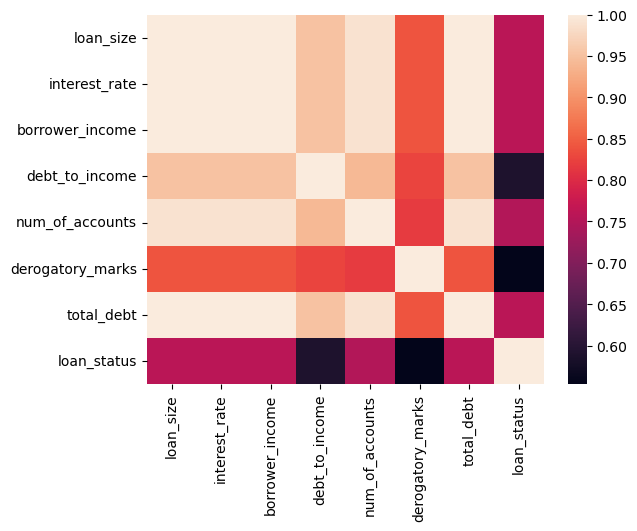

In [62]:
# view the correlations 

corrs = df.corr()
sns.heatmap(corrs)
plt.show()

In [63]:
# confirming multicolinearity 
corrs

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


In [64]:
# confirming positive correlation with loan status 
corrs["loan_status"].sort_values(ascending=False)

loan_status         1.000000
interest_rate       0.758900
borrower_income     0.758890
total_debt          0.758890
loan_size           0.758846
num_of_accounts     0.749802
debt_to_income      0.589305
derogatory_marks    0.553187
Name: loan_status, dtype: float64

In [65]:
# Separate the data into labels and features

# Separate the X variable, the features
X = df.drop(columns=["loan_status"])

# Separate the y variable, the labels
y = df["loan_status"]



In [66]:
# Review the y variable Series( first 5 rows)
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [67]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [68]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [69]:
# Import the train_test_learn module
# Assign a random_state of 1 to the function

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)





(58152, 7) (58152,)
(19384, 7) (19384,)


---

## Create a Logistic Regression Model with the Original Data

In [70]:
#Initiate function 

def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model # Make a prediction using the testing data
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs, # Generate a confusion matrix for the model
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))# Print the classification report for the model

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

TRAINING SET METRICS
[[55980   297]
 [  198  1677]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.89      0.87      1875

    accuracy                           0.99     58152
   macro avg       0.92      0.94      0.93     58152
weighted avg       0.99      0.99      0.99     58152


TESTING SET METRICS
[[18679    80]
 [   67   558]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



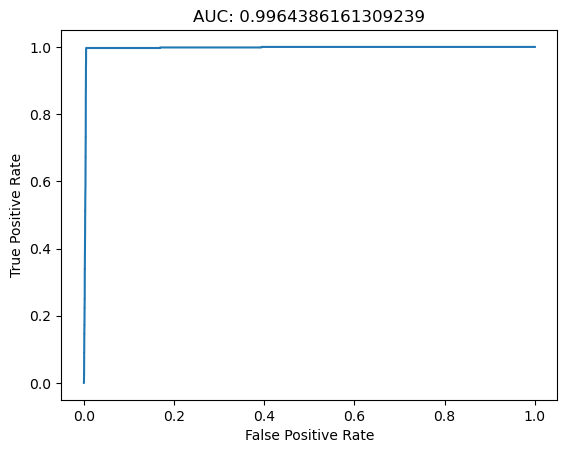

In [71]:
# Init the Logistic Regression model # Print the classification report for the model
# Assign a random_state parameter of 1 to the model
lr = LogisticRegression()


# Fit the model using training data
doMLClassification(lr, X_train, y_train, X_test, y_test)

In [72]:
# AUC reflects almost perfect curve Recall,f1 score between training and test almost the same.
#Accuracy is the same. Almost too perfect. 

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model predicts both the `0` (healthy loan) and `1` (high-risk loan) almost at 100% accuracy.
However, this type of accuracy leads to further exploration of the data set itself for uuncommon flawlessness  !

### Exploratory steps : Using scaled data improved the AUC from Original Auc = 0.9964386161309239  to 0.9965558931712777and improved f1 score and recall . Scaled data shows improvement to only 12 false predictions .

In [73]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [74]:
# Separate the X variable, the features
X = df.drop(columns=["loan_status"])

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale, columns = X.columns)


X_scale.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


TRAINING SET METRICS
[[55980   297]
 [  198  1677]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.89      0.87      1875

    accuracy                           0.99     58152
   macro avg       0.92      0.94      0.93     58152
weighted avg       0.99      0.99      0.99     58152


TESTING SET METRICS
[[18679    80]
 [   67   558]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



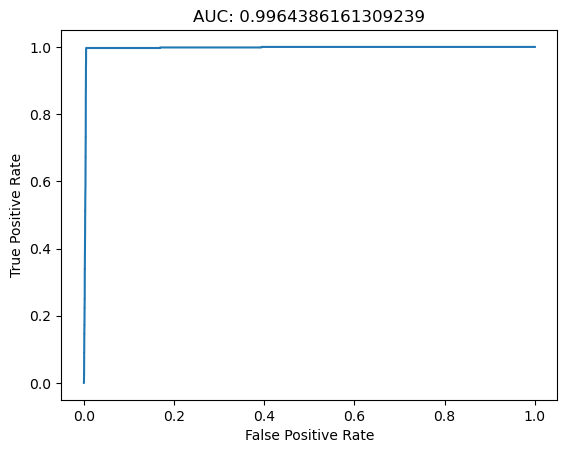

In [75]:
# Init the Logistic Regression model # Print the classification report for the model

lr = LogisticRegression()


# Fit the model using training data
doMLClassification(lr, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[55954   323]
 [   15  1860]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152


TESTING SET METRICS
[[18669    90]
 [    5   620]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384



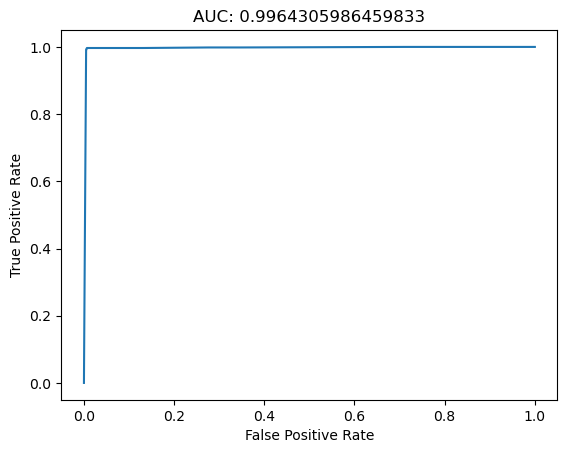

In [98]:
ada = AdaBoostClassifier(random_state=42)
doMLClassification(ada, X_train, y_train, X_test, y_test)

 ### Testing Unscaled data on other Algorithms

---

In [76]:
# Separate the X variable, the features
X = df.drop(columns=["loan_status"])

# Separate the y variable, the labels
y = df["loan_status"]

In [77]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(58152, 7) (58152,)
(19384, 7) (19384,)


TRAINING SET METRICS
[[55951   326]
 [   14  1861]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152


TESTING SET METRICS
[[18669    90]
 [    5   620]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384



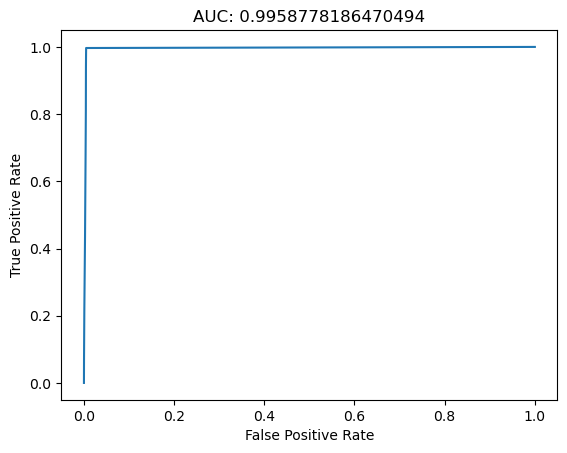

In [78]:
# init the model KNN
knn = KNeighborsClassifier(n_neighbors=25)
doMLClassification(knn, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[56150   127]
 [   29  1846]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.94      0.98      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.97      0.99      0.98     58152
weighted avg       1.00      1.00      1.00     58152


TESTING SET METRICS
[[18681    78]
 [   82   543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.87      0.87       625

    accuracy                           0.99     19384
   macro avg       0.94      0.93      0.93     19384
weighted avg       0.99      0.99      0.99     19384



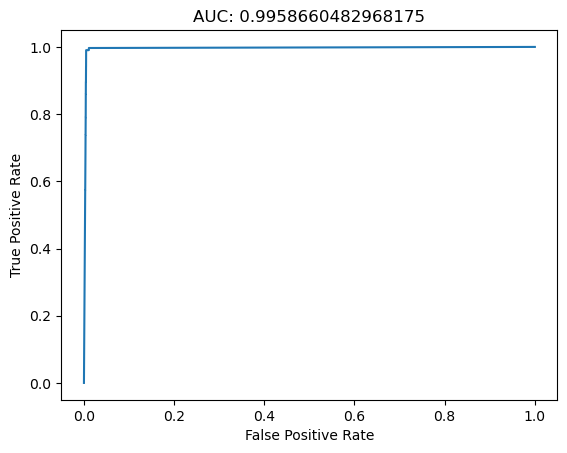

In [79]:
# init the model random forest  slight overfit 
rf = RandomForestClassifier(random_state=42)
doMLClassification(rf, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[55954   323]
 [   15  1860]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152


TESTING SET METRICS
[[18669    90]
 [    5   620]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384



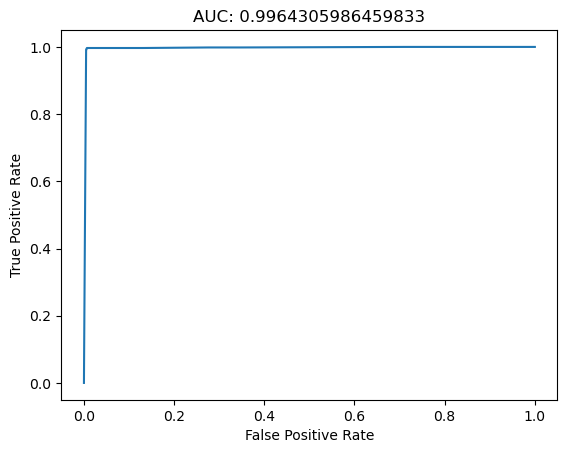

In [80]:
# init the model adaBoost
ada = AdaBoostClassifier(random_state=42)
doMLClassification(ada, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[55965   312]
 [   10  1865]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.86      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152


TESTING SET METRICS
[[18668    91]
 [    6   619]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      1.00     19384



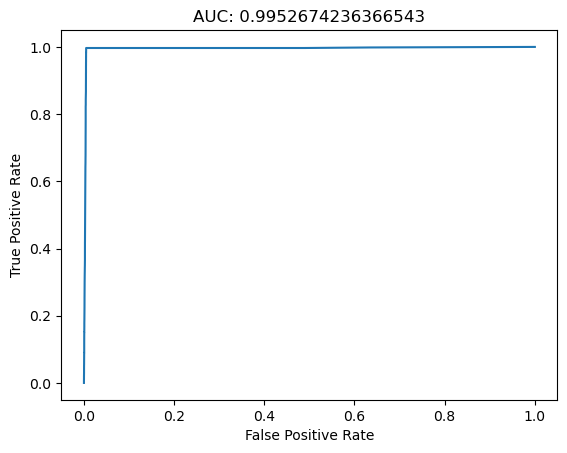

In [81]:
# init the model
gb = GradientBoostingClassifier(random_state=42)
doMLClassification(gb, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[55971   306]
 [   15  1860]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.86      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152


TESTING SET METRICS
[[18670    89]
 [   12   613]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.98      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384



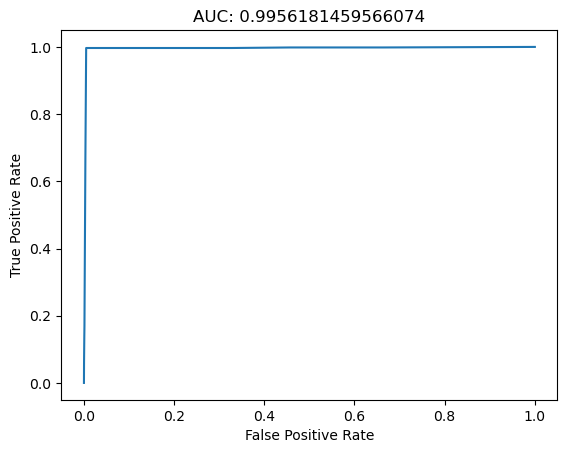

In [82]:
# init the model
xgb = XGBClassifier(random_state=42)
doMLClassification(xgb, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Number of positive: 1875, number of negative: 56277
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1210
[LightGBM] [Info] Number of data points in the train set: 58152, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032243 -> initscore=-3.401677
[LightGBM] [Info] Start training from score -3.401677
TRAINING SET METRICS
[[55955   322]
 [   14  1861]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152


TESTING SET METRICS
[[18669    90]
 [    4   621]]
          

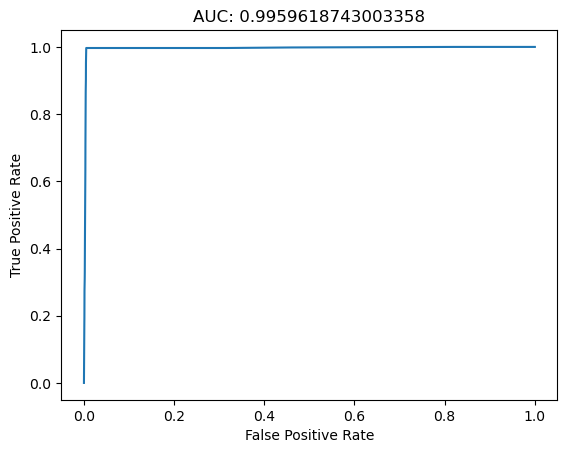

In [83]:
# init the model
lgb = LGBMClassifier(random_state=42)
doMLClassification(lgb, X_train, y_train, X_test, y_test)

### Scaled data conclusion: Ada Boost is the best selection with standard scaler because of Auc score, recall and f1 score no overfitting.

### Exploration using MinMax scaler

---

In [91]:
# Explore using the MinMax Scaler 


scaler2 = MinMaxScaler()
X_scale2 = scaler.fit_transform(X)
X_scale2 = pd.DataFrame(X_scale2, columns = X.columns)


X_scale2.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


In [92]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale2, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(58152, 7) (58152,)
(19384, 7) (19384,)


TRAINING SET METRICS
[[55949   328]
 [   12  1863]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152


TESTING SET METRICS
[[18669    90]
 [    3   622]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      1.00      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      1.00      0.96     19384
weighted avg       1.00      1.00      1.00     19384



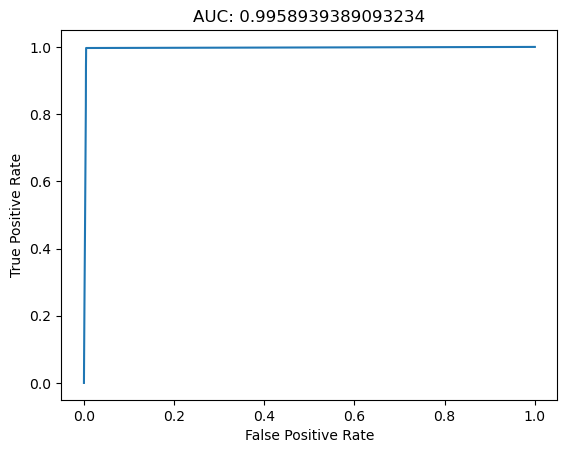

In [93]:
# init the model KNN
knn = KNeighborsClassifier(n_neighbors=25)
doMLClassification(knn, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[56148   129]
 [   27  1848]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.93      0.99      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.97      0.99      0.98     58152
weighted avg       1.00      1.00      1.00     58152


TESTING SET METRICS
[[18681    78]
 [   79   546]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.88      0.87      0.87       625

    accuracy                           0.99     19384
   macro avg       0.94      0.93      0.94     19384
weighted avg       0.99      0.99      0.99     19384



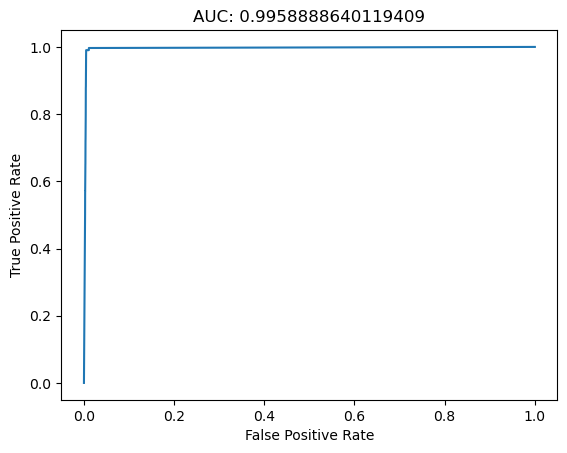

In [94]:
# init the model random forest Overfit with MinMax scaler 
rf = RandomForestClassifier(random_state=42)
doMLClassification(rf, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[55954   323]
 [   15  1860]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152


TESTING SET METRICS
[[18669    90]
 [    5   620]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384



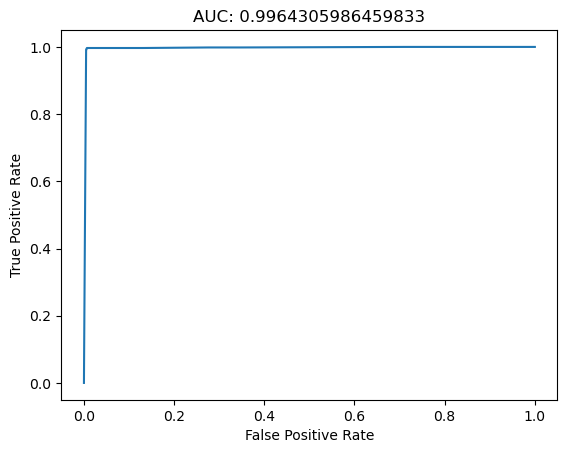

In [95]:
# init the model adaBoost, better metrics so far 
ada = AdaBoostClassifier(random_state=42)
doMLClassification(ada, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[55971   306]
 [   15  1860]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.86      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152


TESTING SET METRICS
[[18670    89]
 [   12   613]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.98      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384



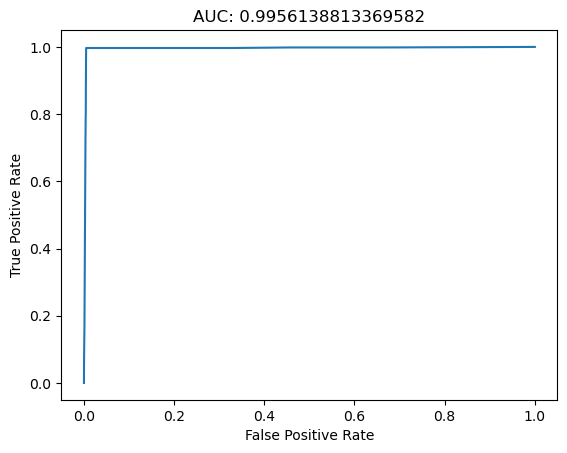

In [96]:
# init the model
xgb = XGBClassifier(random_state=42)
doMLClassification(xgb, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Number of positive: 1875, number of negative: 56277
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1212
[LightGBM] [Info] Number of data points in the train set: 58152, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032243 -> initscore=-3.401677
[LightGBM] [Info] Start training from score -3.401677
TRAINING SET METRICS
[[55959   318]
 [   16  1859]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152


TESTING SET METRICS
[[18669    90]
 [    7   618]]
              precision    recall  f1-score   support

           0       

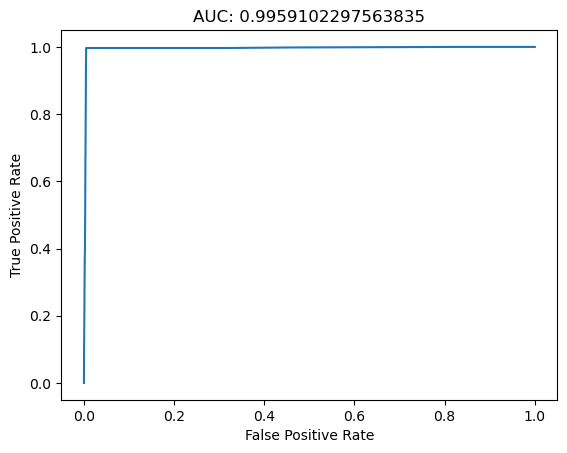

In [97]:
# init the model
lgb = LGBMClassifier(random_state=42)
doMLClassification(lgb, X_train, y_train, X_test, y_test)

### MinMax conclusion: The KNN and Ada model with the MinMax Scaler reflect the best . This is because of AUC score for ada reflects a better score , however the KNN model shows less false positive and recall for KNN was better than the ada boost. The best choice would require some additional domain expertise to confrim which model is best fit between KNN and Ada with the MinMax Scaler. Recall could also be used to decided if this metric is the required priority.